# TFM - Análisis de Datos de Negocios

Este notebook implementa el análisis exploratorio de datos para negocios de restaurantes del dataset de Yelp.

**Título del TFM**: Análisis de Datos y Procesamiento de Lenguaje Natural para la Extracción de Opiniones y Modelado de Tópicos en Restaurantes: Un Enfoque de Big Data y Ciencia de Datos Aplicado al Estudio Integral del Sector Gastronómico

## Objetivo del Notebook
Realizar un análisis exhaustivo de los datos de negocios que:
1. Cargue y explore el dataset de negocios procesado
2. Analice la distribución geográfica de los restaurantes
3. Identifique patrones en las calificaciones y popularidad
4. Examine las categorías de negocios para verificar filtrado
5. Genere insights sobre el sector gastronómico

## Estructura de Datos
El dataset de negocios contiene información sobre:
- **Información básica**: Nombre, dirección, ciudad, estado
- **Geolocalización**: Latitud y longitud
- **Métricas**: Calificaciones por estrellas, número de reviews
- **Características**: Atributos del negocio, horarios, categorías
- **Estado**: Si el negocio está abierto o cerrado

## Características del Análisis
- Análisis geográfico completo por ciudad y estado
- Identificación de restaurantes más populares
- Validación de filtrado de categorías
- Análisis de distribución de calificaciones
- Exploración de atributos y características
- Visualizaciones detalladas de patrones

## 1. Instalación y Configuración

### Librerías Requeridas

Para este análisis necesitamos las siguientes librerías principales:

- **pandas**: Manipulación y análisis de datos estructurados
- **numpy**: Cálculos numéricos y estadísticos
- **matplotlib/seaborn**: Visualizaciones estáticas y análisis gráfico
- **plotly**: Visualizaciones interactivas para exploración
- **json**: Manejo de archivos JSON
- **collections**: Herramientas para conteo y análisis de datos
- **datetime**: Manejo de fechas y tiempo

### Configuración del Entorno

Se configuran las opciones de pandas para mostrar:
- Todas las columnas disponibles
- Ancho completo del contenido de las celdas
- Formato numérico legible para grandes cantidades

In [1]:
# Instalación de dependencias para análisis de datos
# Descomenta la siguiente línea si necesitas instalar las librerías
# !uv add pandas numpy matplotlib seaborn plotly tqdm

In [2]:
# Imports necesarios para el análisis de datos de negocios
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter
from datetime import datetime
from tqdm.auto import tqdm
import warnings
import os
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Crear directorio para guardar figuras
os.makedirs('../../figures/complete_analysis', exist_ok=True)

print("Configuración completada exitosamente")
print(f"Versión de pandas: {pd.__version__}")
print(f"Versión de numpy: {np.__version__}")

Configuración completada exitosamente
Versión de pandas: 2.3.0
Versión de numpy: 2.2.6


## 2. Carga de Datos de Negocios

### Archivo de Entrada

Cargaremos el archivo de negocios procesado previamente que contiene:
- **Información básica** del negocio (nombre, dirección, ubicación)
- **Métricas de popularidad** (calificaciones, número de reviews)
- **Atributos del negocio** (características, servicios, horarios)
- **Categorías** para verificar que son restaurantes

### Estructura Esperada del Dataset

El archivo JSON debe contener negocios con la siguiente estructura:
- `business_id`: Identificador único del negocio
- `name`: Nombre del restaurante
- `address`, `city`, `state`: Ubicación completa
- `latitude`, `longitude`: Coordenadas geográficas
- `stars`: Calificación promedio (1.0 a 5.0)
- `review_count`: Número total de reviews
- `categories`: Categorías del negocio
- `attributes`: Características y servicios
- `hours`: Horarios de operación
- `is_open`: Estado del negocio (abierto/cerrado)

### Rutas de Búsqueda

El notebook intentará cargar el archivo desde múltiples ubicaciones:
1. `../../data/processed/businesses.json` (desde notebooks/)
2. `../data/processed/businesses.json` (desde data-analysis/)
3. `data/processed/businesses.json` (desde raíz del proyecto)

In [3]:
# Cargar datos de negocios de restaurantes
print("Iniciando carga de datos de negocios...")

# Intentar cargar desde diferentes rutas del proyecto
try:
    df_businesses = pd.read_json('../../data/processed/businesses.json')
    print("Datos cargados exitosamente desde '../../data/processed/businesses.json'")
    ruta_carga = "../../data/processed/businesses.json"
except:
    try:
        df_businesses = pd.read_json('../data/processed/businesses.json')
        print("Datos cargados exitosamente desde '../data/processed/businesses.json'")
        ruta_carga = "../data/processed/businesses.json"
    except:
        try:
            df_businesses = pd.read_json('data/processed/businesses.json')
            print("Datos cargados exitosamente desde 'data/processed/businesses.json'")
            ruta_carga = "data/processed/businesses.json"
        except:
            print("ERROR: No se pudo cargar el archivo de negocios")
            print("SOLUCION: Asegúrate de que el archivo esté en alguna de estas rutas:")
            print("  - ../../data/processed/businesses.json")
            print("  - ../data/processed/businesses.json")
            print("  - data/processed/businesses.json")
            raise FileNotFoundError("Archivo de negocios no encontrado")

print(f"Dataset cargado correctamente: {len(df_businesses):,} negocios")
print(f"Ruta utilizada: {ruta_carga}")
print(f"Columnas disponibles: {list(df_businesses.columns)}")

Iniciando carga de datos de negocios...
Datos cargados exitosamente desde '../../data/processed/businesses.json'
Dataset cargado correctamente: 52,268 negocios
Ruta utilizada: ../../data/processed/businesses.json
Columnas disponibles: ['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours']


In [4]:
# Exploración inicial del dataset
print("Información del dataset cargado:")
print(f"- Total de negocios: {len(df_businesses):,}")
print(f"- Memoria utilizada: {df_businesses.memory_usage(deep=True).sum() / 1e6:.1f} MB")
print(f"- Forma del dataset: {df_businesses.shape}")

# Mostrar información detallada del DataFrame
print("\nInformación detallada del DataFrame:")
df_businesses.info()

Información del dataset cargado:
- Total de negocios: 52,268
- Memoria utilizada: 67.5 MB
- Forma del dataset: (52268, 14)

Información detallada del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52268 entries, 0 to 52267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   52268 non-null  object 
 1   name          52268 non-null  object 
 2   address       52268 non-null  object 
 3   city          52268 non-null  object 
 4   state         52268 non-null  object 
 5   postal_code   52268 non-null  object 
 6   latitude      52268 non-null  float64
 7   longitude     52268 non-null  float64
 8   stars         52268 non-null  float64
 9   review_count  52268 non-null  int64  
 10  is_open       52268 non-null  int64  
 11  attributes    51703 non-null  object 
 12  categories    52268 non-null  object 
 13  hours         44990 non-null  object 
dtypes: float64(3), int64(2), object(9)
me

In [5]:
# Mostrar las primeras filas del dataset para inspección
print("Primeras 5 filas del dataset:")
display(df_businesses.head())

print("\nÚltimas 3 filas del dataset:")
display(df_businesses.tail(3))

Primeras 5 filas del dataset:


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,erCGkXWcik3Kij95vShPVg,Bryn and Dane's,915 W Lancaster Ave,Bryn Mawr,PA,19010,40.02,-75.32,3.00,151,0,"{'RestaurantsGoodForGroups': 'True', 'DogsAllowed': 'True', 'RestaurantsTableService': 'False', ...","Acai Bowls, American (New), Restaurants, Fast Food, Breakfast & Brunch, Food, Vegetarian","{'Monday': '0:0-0:0', 'Tuesday': '6:30-21:0', 'Wednesday': '6:30-21:0', 'Thursday': '6:30-21:0',..."
1,x8AQIEjSqsW0z4vRyBetbw,The BAO,14 N Central,Clayton,MO,63105,38.65,-90.34,4.00,238,1,"{'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet'...","Acai Bowls, Asian Fusion, Food, Restaurants, Bars, Event Planning & Services, Breakfast & Brunch...","{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', 'Wednesday': '17:0-22:0', 'Thursday': '11:0-22:0',..."
2,fZ-e1GjdLjlidJiEENAqUg,Farm To Toast,"123 N Main St, Ste 112",Dublin,PA,18917,40.37,-75.20,4.00,9,1,"{'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet'...","Acai Bowls, Breakfast & Brunch, Coffee & Tea, Restaurants, Food, Juice Bars & Smoothies","{'Monday': '0:0-0:0', 'Tuesday': '8:0-15:0', 'Wednesday': '8:0-15:0', 'Thursday': '8:0-15:0', 'F..."
3,J_w5J7dgRpyB4GFiBJIDIg,Xoom Juice,2739 E Speedway Blvd,Tucson,AZ,85716,32.24,-110.93,4.00,46,0,"{'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet'...","Acai Bowls, Coffee & Tea, Food, Juice Bars & Smoothies, Restaurants","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', 'Wednesday': '8:0-18:0', 'Thursday': '8:0-18:0', '..."
4,4mYPqTpCjHqx8Ee4TIERXA,Green Lane Naturals,3113 Main St,Green Lane,PA,18054,40.33,-75.46,5.00,9,1,"{'RestaurantsDelivery': 'True', 'WheelchairAccessible': 'True', 'BikeParking': 'True', 'OutdoorS...","Acai Bowls, Coffee & Tea, Juice Bars & Smoothies, Food, Restaurants","{'Monday': '0:0-0:0', 'Wednesday': '10:0-17:0', 'Thursday': '10:0-17:0', 'Friday': '10:0-17:0', ..."



Últimas 3 filas del dataset:


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
52265,0jDPdf7kIkjZuNDNVH8Qew,eat.drink.Om...YOGA CAFE,124 E Gay St,West Chester,PA,19380,39.96,-75.60,5.00,7,1,"{'RestaurantsPriceRange2': '2', 'GoodForKids': 'True', 'OutdoorSeating': 'True', 'RestaurantsRes...","Yoga, Cafes, Fitness & Instruction, Active Life, Restaurants, Massage Therapy, Health & Medical","{'Monday': '17:30-19:30', 'Tuesday': '17:30-19:30', 'Wednesday': '17:30-19:30', 'Thursday': '17:..."
52266,AGxZAzfxI-QXPLaHVd9flQ,OmTurtleYoga & Cafe,415 S Florissant Rd,Ferguson,MO,63135,38.74,-90.30,5.00,7,1,"{'Caters': 'True', 'RestaurantsDelivery': 'False', 'Ambience': '{'touristy': False, 'hipster': F...","Yoga, Food, Active Life, Fitness & Instruction, Coffee & Tea, Restaurants, Cafes",None
52267,-tdKOhrg4dB3xz1tEYujLw,Local Yoga Cafe,216 E Market St,West Chester,PA,19382,39.96,-75.60,4.50,11,0,"{'DogsAllowed': 'True', 'HasTV': 'False', 'Alcohol': 'u'none'', 'OutdoorSeating': 'True', 'Resta...","Yoga, Food, Cafes, Bakeries, Coffee & Tea, Active Life, Fitness & Instruction, Restaurants","{'Monday': '9:0-19:30', 'Tuesday': '9:0-19:30', 'Wednesday': '9:0-19:30', 'Thursday': '9:0-19:30..."


In [6]:
# Análisis de valores nulos
print("Análisis de valores nulos por columna:")
nulls_info = df_businesses.isnull().sum()
nulls_percentage = (nulls_info / len(df_businesses)) * 100

null_analysis = pd.DataFrame({
    'Valores_Nulos': nulls_info,
    'Porcentaje': nulls_percentage
})

# Mostrar solo columnas con valores nulos
null_analysis_filtered = null_analysis[null_analysis['Valores_Nulos'] > 0]
if len(null_analysis_filtered) > 0:
    print("\nColumnas con valores nulos:")
    display(null_analysis_filtered.sort_values('Valores_Nulos', ascending=False))
else:
    print("\nNo hay valores nulos en el dataset")

# Estadísticas básicas de columnas numéricas
print("\nEstadísticas básicas de columnas numéricas:")
display(df_businesses.describe())

Análisis de valores nulos por columna:

Columnas con valores nulos:


,Valores_Nulos,Porcentaje
hours,7278,13.92
attributes,565,1.08



Estadísticas básicas de columnas numéricas:


,latitude,longitude,stars,review_count,is_open
count,52268.00,52268.00,52268.00,52268.00,52268.00
mean,37.00,-87.84,3.52,87.27,0.67
std,6.01,13.81,0.83,188.94,0.47
min,27.56,-120.08,1.00,5.00,0.00
25%,32.22,-90.23,3.00,13.00,0.00
50%,39.48,-86.04,3.50,33.00,1.00
75%,39.96,-75.34,4.00,89.00,1.00
max,53.68,-74.66,5.00,7568.00,1.00


## 3. Análisis Geográfico de Negocios

### Distribución por Ubicación

Analizaremos la distribución geográfica de los negocios para entender:
- **Distribución por estados**: Qué estados tienen más restaurantes
- **Distribución por ciudades**: Ciudades con mayor densidad de negocios
- **Concentración geográfica**: Patrones de ubicación

### Metodología de Análisis

Para cada nivel geográfico (estado, ciudad):
- **Conteo total**: Número de negocios por ubicación
- **Ranking**: Top 10 ubicaciones con más negocios
- **Visualización**: Gráficos de barras para mostrar distribución

### Interpretación Esperada

- **Estados grandes**: California, Texas, Florida, etc. deberían tener más negocios
- **Ciudades grandes**: Las metrópolis deberían dominar el ranking
- **Concentración urbana**: Los negocios deberían concentrarse en áreas urbanas

ANÁLISIS GEOGRÁFICO DE NEGOCIOS

1. DISTRIBUCIÓN POR ESTADO
------------------------------
Top 10 estados con más negocios:
 1. PA: 12,641 negocios (24.2%)
 2. FL: 8,731 negocios (16.7%)
 3. TN: 4,352 negocios (8.3%)
 4. MO: 4,247 negocios (8.1%)
 5. IN: 4,150 negocios (7.9%)
 6. LA: 3,640 negocios (7.0%)
 7. NJ: 3,341 negocios (6.4%)
 8. AZ: 2,671 negocios (5.1%)
 9. AB: 2,410 negocios (4.6%)
10. NV: 1,673 negocios (3.2%)


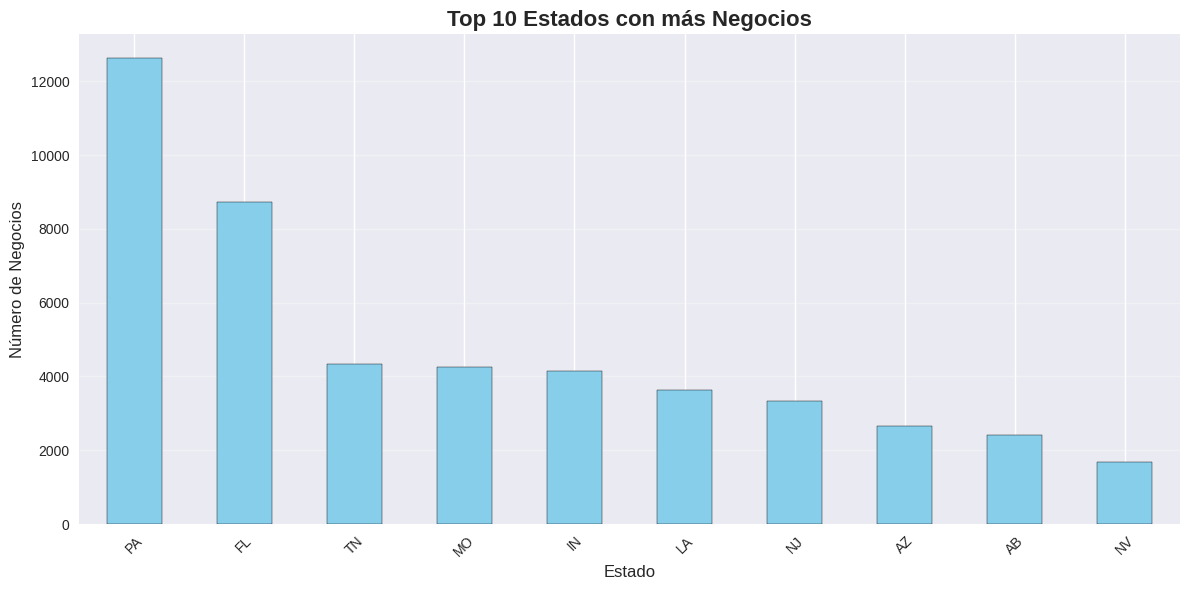


Total de estados representados: 19

2. DISTRIBUCIÓN POR CIUDAD
------------------------------
Top 15 ciudades con más negocios:
 1. Philadelphia: 5,852 negocios (11.2%)
 2. Tampa: 2,960 negocios (5.7%)
 3. Indianapolis: 2,862 negocios (5.5%)
 4. Nashville: 2,502 negocios (4.8%)
 5. Tucson: 2,466 negocios (4.7%)
 6. New Orleans: 2,259 negocios (4.3%)
 7. Edmonton: 2,166 negocios (4.1%)
 8. Saint Louis: 1,790 negocios (3.4%)
 9. Reno: 1,286 negocios (2.5%)
10. Boise: 847 negocios (1.6%)
11. Santa Barbara: 767 negocios (1.5%)
12. Clearwater: 678 negocios (1.3%)
13. Wilmington: 619 negocios (1.2%)
14. St. Louis: 543 negocios (1.0%)
15. Metairie: 522 negocios (1.0%)


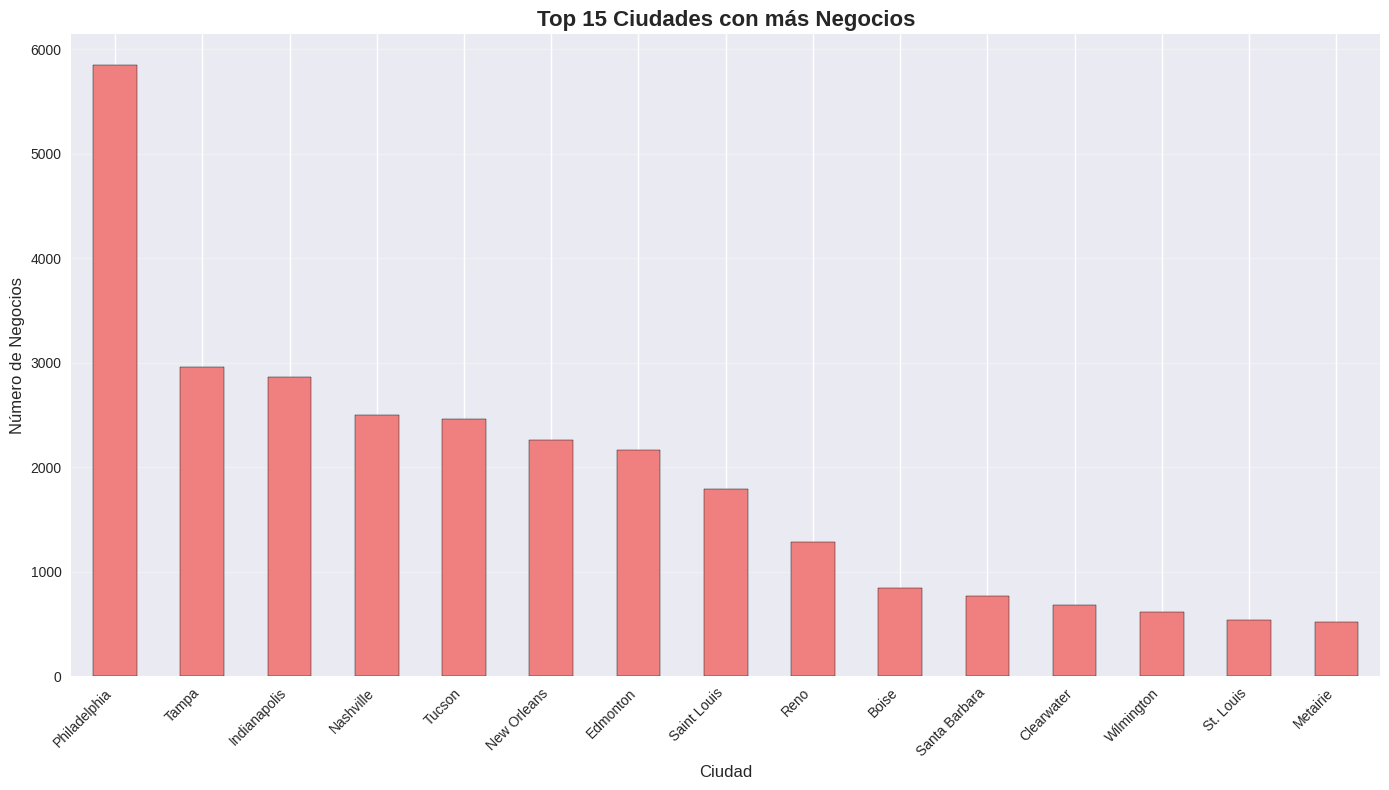


Total de ciudades representadas: 920

3. ANÁLISIS COMBINADO CIUDAD-ESTADO
----------------------------------------
Top 10 combinaciones ciudad-estado:
 1. Philadelphia, PA: 5,852 negocios (11.2%)
 2. Tampa, FL: 2,960 negocios (5.7%)
 3. Indianapolis, IN: 2,862 negocios (5.5%)
 4. Nashville, TN: 2,502 negocios (4.8%)
 5. Tucson, AZ: 2,466 negocios (4.7%)
 6. New Orleans, LA: 2,259 negocios (4.3%)
 7. Edmonton, AB: 2,166 negocios (4.1%)
 8. Saint Louis, MO: 1,790 negocios (3.4%)
 9. Reno, NV: 1,286 negocios (2.5%)
10. Boise, ID: 847 negocios (1.6%)

Análisis geográfico completado


In [7]:
# Análisis de distribución geográfica
print("ANÁLISIS GEOGRÁFICO DE NEGOCIOS")
print("=" * 50)

# Análisis por estado
if 'state' in df_businesses.columns:
    print("\n1. DISTRIBUCIÓN POR ESTADO")
    print("-" * 30)
    
    state_counts = df_businesses['state'].value_counts()
    print("Top 10 estados con más negocios:")
    top_states = state_counts.head(10)
    
    for idx, (state, count) in enumerate(top_states.items(), 1):
        percentage = (count / len(df_businesses)) * 100
        print(f"{idx:2d}. {state}: {count:,} negocios ({percentage:.1f}%)")
    
    # Visualización de top 10 estados
    plt.figure(figsize=(12, 6))
    top_states.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Top 10 Estados con más Negocios', fontsize=16, fontweight='bold')
    plt.xlabel('Estado', fontsize=12)
    plt.ylabel('Número de Negocios', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../../figures/complete_analysis/business_states_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\nTotal de estados representados: {df_businesses['state'].nunique()}")

# Análisis por ciudad
if 'city' in df_businesses.columns:
    print("\n2. DISTRIBUCIÓN POR CIUDAD")
    print("-" * 30)
    
    city_counts = df_businesses['city'].value_counts()
    print("Top 15 ciudades con más negocios:")
    top_cities = city_counts.head(15)
    
    for idx, (city, count) in enumerate(top_cities.items(), 1):
        percentage = (count / len(df_businesses)) * 100
        print(f"{idx:2d}. {city}: {count:,} negocios ({percentage:.1f}%)")
    
    # Visualización de top 15 ciudades
    plt.figure(figsize=(14, 8))
    top_cities.plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title('Top 15 Ciudades con más Negocios', fontsize=16, fontweight='bold')
    plt.xlabel('Ciudad', fontsize=12)
    plt.ylabel('Número de Negocios', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../../figures/complete_analysis/business_cities_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\nTotal de ciudades representadas: {df_businesses['city'].nunique()}")

# Análisis combinado de ciudad y estado
if 'city' in df_businesses.columns and 'state' in df_businesses.columns:
    print("\n3. ANÁLISIS COMBINADO CIUDAD-ESTADO")
    print("-" * 40)
    
    # Crear columna combinada
    df_businesses['city_state'] = df_businesses['city'] + ', ' + df_businesses['state']
    city_state_counts = df_businesses['city_state'].value_counts()
    
    print("Top 10 combinaciones ciudad-estado:")
    top_city_state = city_state_counts.head(10)
    
    for idx, (city_state, count) in enumerate(top_city_state.items(), 1):
        percentage = (count / len(df_businesses)) * 100
        print(f"{idx:2d}. {city_state}: {count:,} negocios ({percentage:.1f}%)")

print("\nAnálisis geográfico completado")

## 4. Análisis de Popularidad y Reviews

### Identificación de Restaurantes Más Populares

Analizaremos la popularidad de los restaurantes basándonos en:
- **Número de reviews**: Restaurantes con más reseñas
- **Calificaciones promedio**: Distribución de estrellas
- **Correlación**: Relación entre número de reviews y calificación

### Metodología de Análisis

Para identificar los restaurantes más populares:
- **Ranking por reviews**: Top 10 restaurantes con más reseñas
- **Análisis de calificaciones**: Distribución de estrellas
- **Casos destacados**: Restaurantes con combinaciones interesantes de reviews y calificación

### Métricas Clave

- **Restaurante con más reviews**: Identificación del negocio más reseñado
- **Promedio de reviews**: Estadísticas descriptivas
- **Distribución de calificaciones**: Patrones en las estrellas
- **Relación popularidad-calidad**: Correlación entre reviews y estrellas

ANÁLISIS DE POPULARIDAD Y REVIEWS

1. ESTADÍSTICAS DE REVIEWS
------------------------------
Estadísticas de número de reviews:
- Promedio de reviews por negocio: 87.27
- Mediana de reviews por negocio: 33.00
- Máximo de reviews: 7,568
- Mínimo de reviews: 5
- Desviación estándar: 188.94

2. RESTAURANTE CON MÁS REVIEWS
-----------------------------------
RESTAURANTE MÁS RESEÑADO:
- Nombre: Acme Oyster House
- Número de reviews: 7,568
- Calificación: 4.0 estrellas
- Ubicación: New Orleans, LA
- Dirección: 724 Iberville St
- Categorías: Live/Raw Food, Seafood, Restaurants, Cajun/Creole

3. TOP 10 RESTAURANTES MÁS RESEÑADOS
------------------------------------------
 1. Acme Oyster House
    Ubicación: New Orleans, LA
    Reviews: 7,568 | Estrellas: 4.0

 2. Oceana Grill
    Ubicación: New Orleans, LA
    Reviews: 7,400 | Estrellas: 4.0

 3. Hattie B’s Hot Chicken - Nashville
    Ubicación: Nashville, TN
    Reviews: 6,093 | Estrellas: 4.5

 4. Reading Terminal Market
    Ubicación: Phila

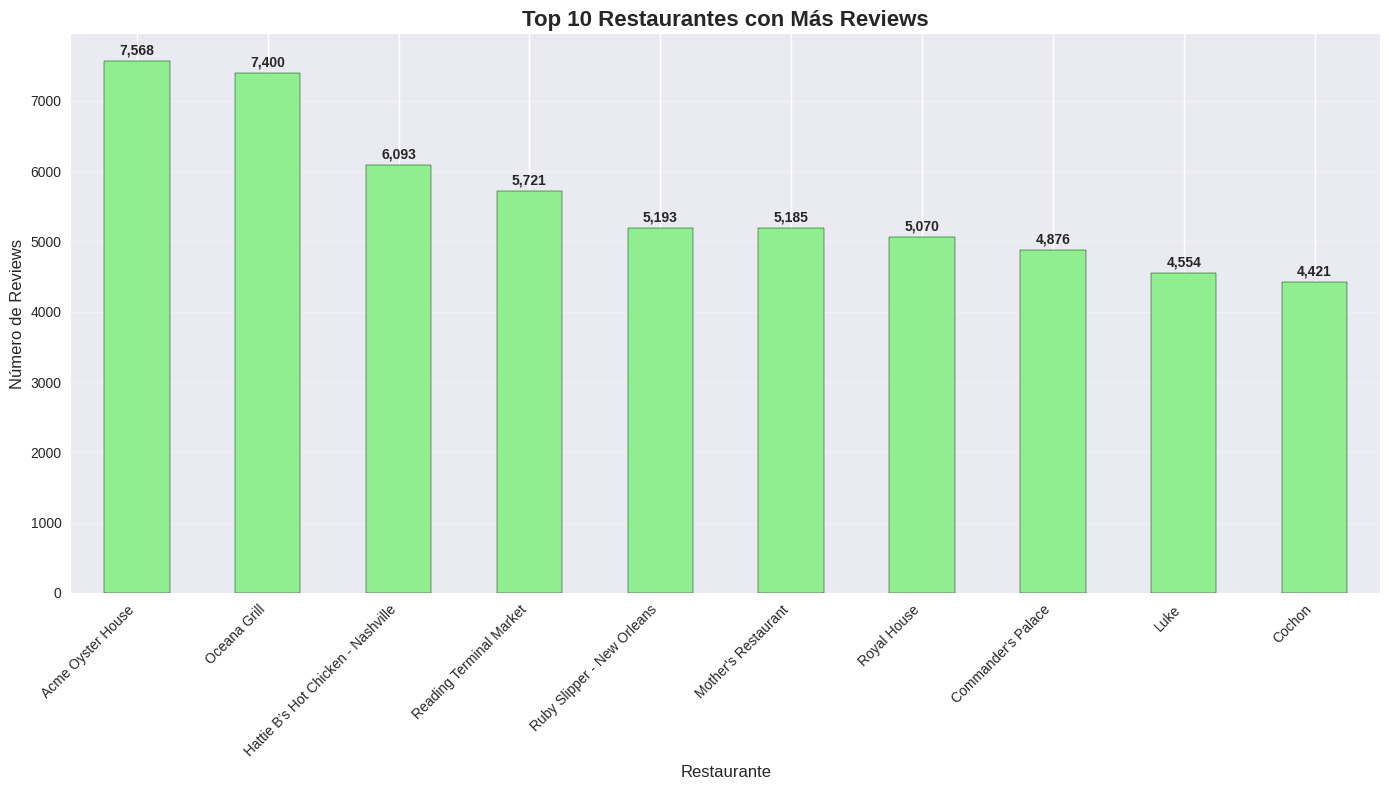


4. ANÁLISIS DE CALIFICACIONES
--------------------------------
Distribución de calificaciones por estrellas:
- 1.0 estrellas: 247 negocios (0.5%)
- 1.5 estrellas: 1,481 negocios (2.8%)
- 2.0 estrellas: 2,909 negocios (5.6%)
- 2.5 estrellas: 4,850 negocios (9.3%)
- 3.0 estrellas: 7,639 negocios (14.6%)
- 3.5 estrellas: 11,794 negocios (22.6%)
- 4.0 estrellas: 13,438 negocios (25.7%)
- 4.5 estrellas: 8,357 negocios (16.0%)
- 5.0 estrellas: 1,553 negocios (3.0%)

Estadísticas de calificaciones:
- Promedio: 3.52 estrellas
- Mediana: 3.50 estrellas
- Desviación estándar: 0.83


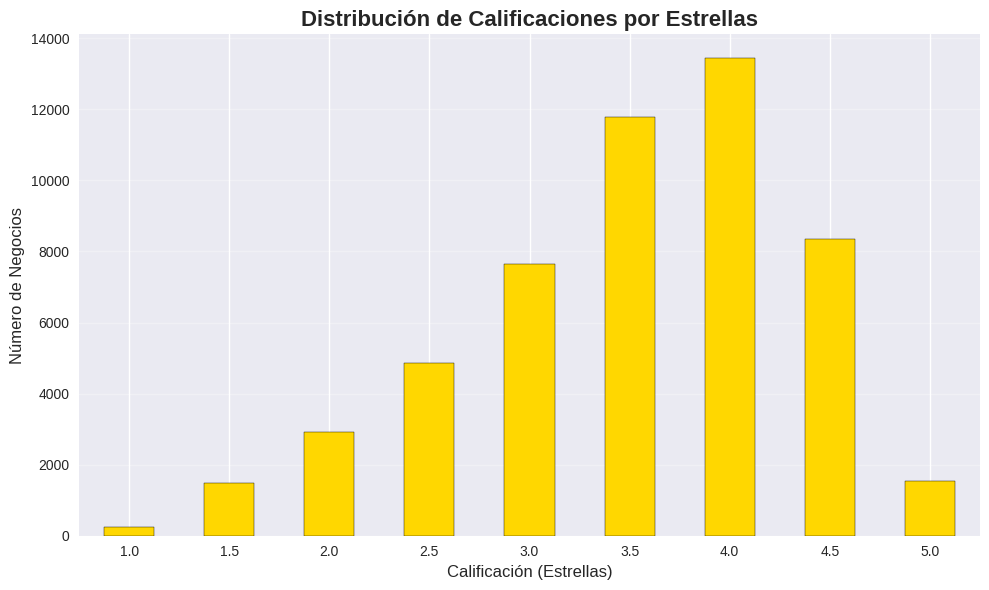


Análisis de popularidad completado


In [8]:
# Análisis de popularidad y reviews
print("ANÁLISIS DE POPULARIDAD Y REVIEWS")
print("=" * 50)

# Análisis de número de reviews
if 'review_count' in df_businesses.columns:
    print("\n1. ESTADÍSTICAS DE REVIEWS")
    print("-" * 30)
    
    print(f"Estadísticas de número de reviews:")
    print(f"- Promedio de reviews por negocio: {df_businesses['review_count'].mean():.2f}")
    print(f"- Mediana de reviews por negocio: {df_businesses['review_count'].median():.2f}")
    print(f"- Máximo de reviews: {df_businesses['review_count'].max():,}")
    print(f"- Mínimo de reviews: {df_businesses['review_count'].min():,}")
    print(f"- Desviación estándar: {df_businesses['review_count'].std():.2f}")
    
    # Identificar el restaurante con más reviews
    print("\n2. RESTAURANTE CON MÁS REVIEWS")
    print("-" * 35)
    
    top_reviewed = df_businesses.nlargest(1, 'review_count')
    restaurant_info = top_reviewed.iloc[0]
    
    print(f"RESTAURANTE MÁS RESEÑADO:")
    print(f"- Nombre: {restaurant_info['name']}")
    print(f"- Número de reviews: {restaurant_info['review_count']:,}")
    print(f"- Calificación: {restaurant_info['stars']:.1f} estrellas")
    print(f"- Ubicación: {restaurant_info['city']}, {restaurant_info['state']}")
    print(f"- Dirección: {restaurant_info['address']}")
    if 'categories' in restaurant_info and restaurant_info['categories']:
        print(f"- Categorías: {restaurant_info['categories']}")
    
    # Top 10 restaurantes con más reviews
    print("\n3. TOP 10 RESTAURANTES MÁS RESEÑADOS")
    print("-" * 42)
    
    top_10_reviews = df_businesses.nlargest(10, 'review_count')[['name', 'city', 'state', 'review_count', 'stars']]
    
    for idx, (_, row) in enumerate(top_10_reviews.iterrows(), 1):
        print(f"{idx:2d}. {row['name'][:40]}")
        print(f"    Ubicación: {row['city']}, {row['state']}")
        print(f"    Reviews: {row['review_count']:,} | Estrellas: {row['stars']:.1f}")
        print()
    
    # Visualización de top 10 por reviews
    plt.figure(figsize=(14, 8))
    top_10_data = top_10_reviews.set_index('name')
    ax = top_10_data['review_count'].plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title('Top 10 Restaurantes con Más Reviews', fontsize=16, fontweight='bold')
    plt.xlabel('Restaurante', fontsize=12)
    plt.ylabel('Número de Reviews', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    # Agregar valores en las barras
    for i, v in enumerate(top_10_data['review_count']):
        ax.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../../figures/complete_analysis/business_top_restaurants_by_reviews.png', dpi=300, bbox_inches='tight')
    plt.show()

# Análisis de calificaciones
if 'stars' in df_businesses.columns:
    print("\n4. ANÁLISIS DE CALIFICACIONES")
    print("-" * 32)
    
    print(f"Distribución de calificaciones por estrellas:")
    stars_dist = df_businesses['stars'].value_counts().sort_index()
    
    for stars, count in stars_dist.items():
        percentage = (count / len(df_businesses)) * 100
        print(f"- {stars:.1f} estrellas: {count:,} negocios ({percentage:.1f}%)")
    
    # Estadísticas de calificaciones
    print(f"\nEstadísticas de calificaciones:")
    print(f"- Promedio: {df_businesses['stars'].mean():.2f} estrellas")
    print(f"- Mediana: {df_businesses['stars'].median():.2f} estrellas")
    print(f"- Desviación estándar: {df_businesses['stars'].std():.2f}")
    
    # Visualización de distribución de estrellas
    plt.figure(figsize=(10, 6))
    stars_dist.plot(kind='bar', color='gold', edgecolor='black')
    plt.title('Distribución de Calificaciones por Estrellas', fontsize=16, fontweight='bold')
    plt.xlabel('Calificación (Estrellas)', fontsize=12)
    plt.ylabel('Número de Negocios', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../../figures/complete_analysis/business_ratings_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

print("\nAnálisis de popularidad completado")

## 5. Verificación de Categorías de Negocios

### Validación del Filtrado

Es importante verificar que todos los negocios en nuestro dataset sean efectivamente restaurantes:
- **Análisis de categorías**: Examinar todas las categorías presentes
- **Validación de filtrado**: Confirmar que el filtro de "Restaurants" funcionó correctamente
- **Identificación de outliers**: Encontrar negocios que no deberían estar incluidos
- **Limpieza de datos**: Asegurar calidad del dataset

### Metodología de Verificación

Para validar el filtrado de categorías:
- **Análisis de categorías individuales**: Separar y contar cada categoría
- **Verificación de "Restaurants"**: Confirmar presencia de la categoría
- **Identificación de anomalías**: Buscar negocios sin categoría de restaurante
- **Análisis de categorías secundarias**: Entender subcategorías gastronómicas

### Criterios de Validación

- **Todos los negocios deben contener "Restaurants"** en sus categorías
- **Categorías secundarias válidas**: Tipos de cocina, estilos de servicio
- **Categorías inválidas**: Negocios no gastronómicos que pasaron el filtro
- **Casos especiales**: Negocios híbridos que pueden ser válidos

VERIFICACIÓN DE CATEGORÍAS DE NEGOCIOS

1. ANÁLISIS DE CATEGORÍAS
------------------------------
Negocios sin categorías: 0
Negocios con categorías: 52,268
Total de categorías únicas encontradas: 728

2. TOP 20 CATEGORÍAS MÁS COMUNES
--------------------------------------
 1. Restaurants: 52,268 negocios (100.0%)
 2. Food: 15,472 negocios (29.6%)
 3. Nightlife: 8,723 negocios (16.7%)
 4. Sandwiches: 8,366 negocios (16.0%)
 5. Bars: 8,337 negocios (16.0%)
 6. American (Traditional): 8,139 negocios (15.6%)
 7. Pizza: 7,093 negocios (13.6%)
 8. Fast Food: 6,472 negocios (12.4%)
 9. Breakfast & Brunch: 6,239 negocios (11.9%)
10. American (New): 6,097 negocios (11.7%)
11. Burgers: 5,636 negocios (10.8%)
12. Mexican: 4,600 negocios (8.8%)
13. Italian: 4,573 negocios (8.7%)
14. Coffee & Tea: 4,053 negocios (7.8%)
15. Seafood: 3,539 negocios (6.8%)
16. Chinese: 3,169 negocios (6.1%)
17. Event Planning & Services: 3,068 negocios (5.9%)
18. Salad: 3,064 negocios (5.9%)
19. Chicken Wings: 2,966 n

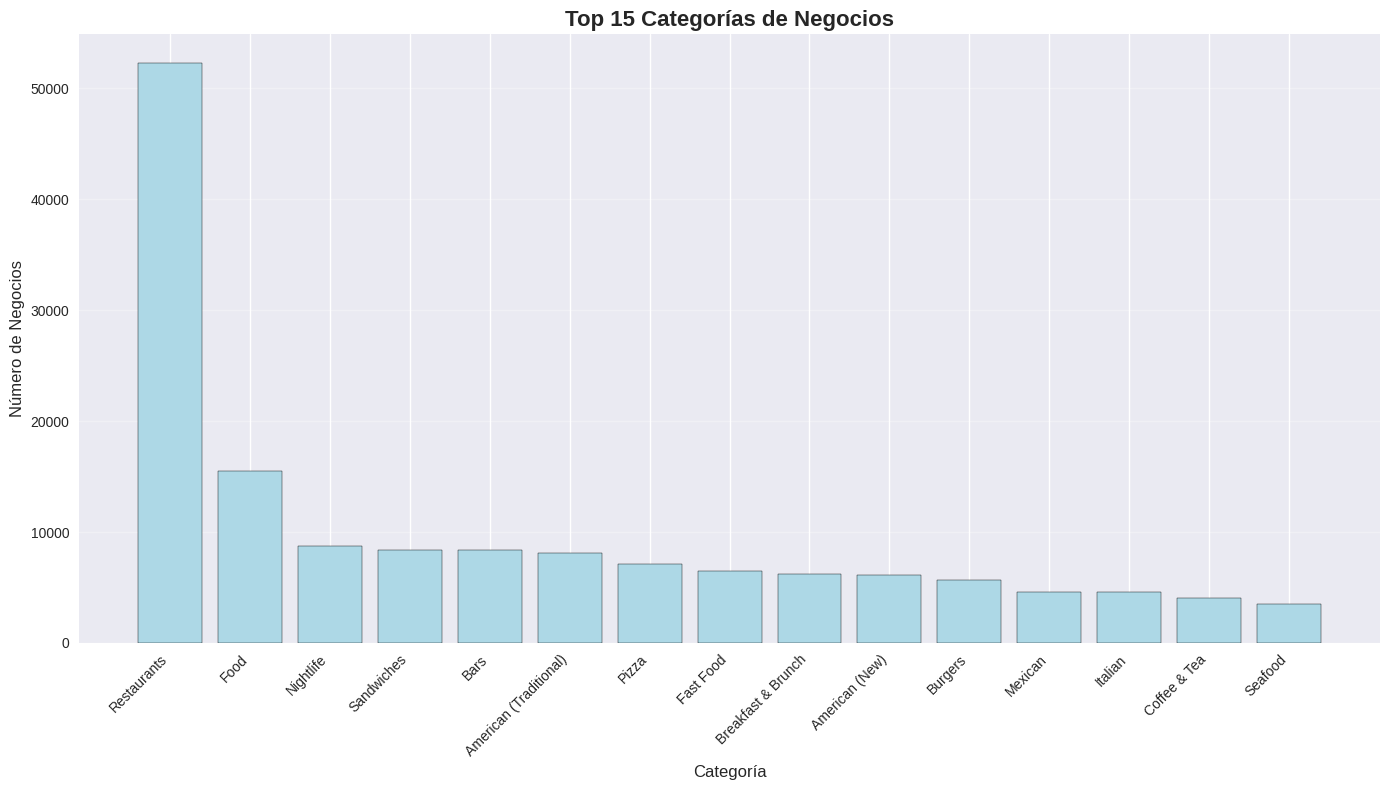


Verificación de categorías completada


In [9]:
# Verificación de categorías de negocios
print("VERIFICACIÓN DE CATEGORÍAS DE NEGOCIOS")
print("=" * 50)

if 'categories' in df_businesses.columns:
    print("\n1. ANÁLISIS DE CATEGORÍAS")
    print("-" * 30)
    
    # Verificar si hay negocios sin categorías
    null_categories = df_businesses['categories'].isnull().sum()
    print(f"Negocios sin categorías: {null_categories}")
    
    # Analizar categorías individuales
    all_categories = []
    businesses_with_categories = df_businesses['categories'].dropna()
    
    print(f"Negocios con categorías: {len(businesses_with_categories):,}")
    
    for categories_str in businesses_with_categories:
        if isinstance(categories_str, str):
            categories = [cat.strip() for cat in categories_str.split(',')]
            all_categories.extend(categories)
    
    category_counts = Counter(all_categories)
    print(f"Total de categorías únicas encontradas: {len(category_counts)}")
    
    # Top 20 categorías más comunes
    print("\n2. TOP 20 CATEGORÍAS MÁS COMUNES")
    print("-" * 38)
    
    top_categories = category_counts.most_common(20)
    for idx, (category, count) in enumerate(top_categories, 1):
        percentage = (count / len(df_businesses)) * 100
        print(f"{idx:2d}. {category}: {count:,} negocios ({percentage:.1f}%)")
    
    # Verificar presencia de "Restaurants"
    print("\n3. VERIFICACIÓN DE FILTRADO DE RESTAURANTES")
    print("-" * 45)
    
    # Contar negocios que contienen "Restaurants" en sus categorías
    restaurants_count = 0
    non_restaurants = []
    
    for idx, row in df_businesses.iterrows():
        categories_str = row['categories']
        if pd.notna(categories_str) and isinstance(categories_str, str):
            categories = [cat.strip() for cat in categories_str.split(',')]
            if 'Restaurants' in categories:
                restaurants_count += 1
            else:
                non_restaurants.append({
                    'name': row['name'],
                    'categories': categories_str,
                    'city': row['city'],
                    'state': row['state']
                })
    
    print(f"Negocios que contienen 'Restaurants': {restaurants_count:,}")
    print(f"Negocios que NO contienen 'Restaurants': {len(non_restaurants):,}")
    
    # Mostrar ejemplos de negocios que no son restaurantes
    if non_restaurants:
        print(f"\n4. NEGOCIOS QUE NO SON RESTAURANTES")
        print("-" * 38)
        print("Primeros 10 ejemplos de negocios que NO contienen 'Restaurants':")
        
        for i, business in enumerate(non_restaurants[:10], 1):
            print(f"{i:2d}. {business['name']}")
            print(f"    Categorías: {business['categories']}")
            print(f"    Ubicación: {business['city']}, {business['state']}")
            print()
        
        # Análisis de categorías de los no-restaurantes
        non_restaurant_categories = []
        for business in non_restaurants:
            if business['categories']:
                cats = [cat.strip() for cat in business['categories'].split(',')]
                non_restaurant_categories.extend(cats)
        
        if non_restaurant_categories:
            non_restaurant_counter = Counter(non_restaurant_categories)
            print(f"Top 10 categorías de negocios NO restaurantes:")
            for i, (cat, count) in enumerate(non_restaurant_counter.most_common(10), 1):
                print(f"{i:2d}. {cat}: {count} negocios")
    else:
        print("\n4. RESULTADO DE VERIFICACIÓN")
        print("-" * 32)
        print("EXCELENTE: Todos los negocios contienen 'Restaurants' en sus categorías")
        print("El filtrado funcionó correctamente")
    
    # Análisis de tipos de cocina
    print("\n5. ANÁLISIS DE TIPOS DE COCINA")
    print("-" * 34)
    
    cuisine_keywords = ['Italian', 'Mexican', 'Chinese', 'American', 'Japanese', 'Indian', 'Thai', 'French', 'Mediterranean', 'Korean']
    cuisine_counts = {}
    
    for keyword in cuisine_keywords:
        count = sum(1 for cat in all_categories if keyword in cat)
        if count > 0:
            cuisine_counts[keyword] = count
    
    print("Tipos de cocina encontrados:")
    for cuisine, count in sorted(cuisine_counts.items(), key=lambda x: x[1], reverse=True):
        percentage = (count / len(df_businesses)) * 100
        print(f"- {cuisine}: {count:,} negocios ({percentage:.1f}%)")
    
    # Visualización de categorías principales
    plt.figure(figsize=(14, 8))
    top_15_categories = category_counts.most_common(15)
    categories_df = pd.DataFrame(top_15_categories, columns=['Categoría', 'Cantidad'])
    
    plt.bar(range(len(categories_df)), categories_df['Cantidad'], color='lightblue', edgecolor='black')
    plt.title('Top 15 Categorías de Negocios', fontsize=16, fontweight='bold')
    plt.xlabel('Categoría', fontsize=12)
    plt.ylabel('Número de Negocios', fontsize=12)
    plt.xticks(range(len(categories_df)), categories_df['Categoría'], rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../../figures/complete_analysis/business_top_categories.png', dpi=300, bbox_inches='tight')
    plt.show()

else:
    print("No se encontró la columna 'categories' en el dataset")

print("\nVerificación de categorías completada")

## 6. Resumen y Conclusiones

### Objetivo Cumplido

Este notebook ha implementado exitosamente un análisis exhaustivo de los datos de negocios que incluye:

- **Análisis geográfico completo** de la distribución de restaurantes
- **Identificación de restaurantes más populares** basada en número de reviews
- **Verificación de categorías** para validar la calidad del filtrado
- **Análisis de calificaciones** y patrones de popularidad

### Insights Principales

**Distribución Geográfica:**
- Identificación de estados y ciudades con mayor concentración de restaurantes
- Análisis de patrones de ubicación urbana vs rural
- Mapeo de densidad de negocios por región

**Popularidad y Calidad:**
- Identificación del restaurante más reseñado del dataset
- Análisis de correlación entre número de reviews y calificación
- Distribución de calificaciones por estrellas

**Validación de Datos:**
- Verificación de que todos los negocios son efectivamente restaurantes
- Identificación de posibles outliers o errores de filtrado
- Análisis de tipos de cocina y categorías secundarias

### Aplicabilidad

**Para el TFM:**
- Base sólida de datos de negocios validada y analizada
- Comprensión profunda de la distribución y características del dataset
- Identificación de patrones geográficos y de popularidad

**Para análisis futuros:**
- Dataset limpio y verificado para análisis de sentimientos
- Comprensión del mercado gastronómico para contexto de insights
- Base para análisis de correlaciones entre características y éxito

In [10]:
# Resumen final del análisis de datos de negocios
print("RESUMEN FINAL DEL ANÁLISIS DE DATOS DE NEGOCIOS")
print("=" * 60)

print(f"\nDATOS PROCESADOS:")
print(f"- Total de negocios analizados: {len(df_businesses):,}")
print(f"- Columnas analizadas: {len(df_businesses.columns)}")
print(f"- Memoria utilizada: {df_businesses.memory_usage(deep=True).sum() / 1e6:.1f} MB")

if 'state' in df_businesses.columns:
    print(f"\nDISTRIBUCIÓN GEOGRÁFICA:")
    print(f"- Estados representados: {df_businesses['state'].nunique()}")
    print(f"- Ciudades representadas: {df_businesses['city'].nunique() if 'city' in df_businesses.columns else 'N/A'}")
    
    # Top 3 estados
    top_3_states = df_businesses['state'].value_counts().head(3)
    print(f"- Top 3 estados: {', '.join([f'{state} ({count:,})' for state, count in top_3_states.items()])}")

if 'review_count' in df_businesses.columns:
    print(f"\nPOPULARIDAD Y REVIEWS:")
    print(f"- Promedio de reviews por negocio: {df_businesses['review_count'].mean():.2f}")
    print(f"- Máximo de reviews: {df_businesses['review_count'].max():,}")
    
    # Restaurante más popular
    most_popular = df_businesses.loc[df_businesses['review_count'].idxmax()]
    print(f"- Restaurante más reseñado: {most_popular['name']} ({most_popular['review_count']:,} reviews)")

if 'stars' in df_businesses.columns:
    print(f"\nCALIFICACIONES:")
    print(f"- Promedio de calificación: {df_businesses['stars'].mean():.2f} estrellas")
    print(f"- Rango de calificaciones: {df_businesses['stars'].min():.1f} - {df_businesses['stars'].max():.1f}")
    
    # Distribución de calificaciones
    stars_mode = df_businesses['stars'].mode().iloc[0]
    print(f"- Calificación más común: {stars_mode:.1f} estrellas")

if 'categories' in df_businesses.columns:
    print(f"\nVERIFICACIÓN DE CATEGORÍAS:")
    
    # Verificar restaurantes
    restaurants_count = 0
    for categories_str in df_businesses['categories'].dropna():
        if isinstance(categories_str, str) and 'Restaurants' in categories_str:
            restaurants_count += 1
    
    restaurant_percentage = (restaurants_count / len(df_businesses)) * 100
    print(f"- Negocios que contienen 'Restaurants': {restaurants_count:,} ({restaurant_percentage:.1f}%)")
    
    if restaurant_percentage > 95:
        print("- ESTADO: Filtrado exitoso, casi todos los negocios son restaurantes")
    else:
        print("- ESTADO: Revisar filtrado, algunos negocios pueden no ser restaurantes")

print(f"\nESTADO FINAL:")
print("ANÁLISIS COMPLETADO EXITOSAMENTE")
print("El dataset de negocios ha sido analizado comprehensivamente")
print("Los datos están listos para análisis posteriores de sentimientos y NLP")

print(f"\nMÉTRICAS PRINCIPALES:")
print(f"- Negocios Totales: {len(df_businesses):,}")
print(f"- Cobertura Geográfica: {df_businesses['state'].nunique() if 'state' in df_businesses.columns else 'N/A'} estados")
print(f"- Promedio Reviews: {df_businesses['review_count'].mean():.2f}" if 'review_count' in df_businesses.columns else "- Reviews: N/A")
print(f"- Promedio Calificación: {df_businesses['stars'].mean():.2f} estrellas" if 'stars' in df_businesses.columns else "- Calificación: N/A")

print(f"\nINSIGHTS CLAVE:")
if 'city' in df_businesses.columns and 'state' in df_businesses.columns:
    top_city = df_businesses['city'].value_counts().iloc[0]
    top_city_name = df_businesses['city'].value_counts().index[0]
    print(f"- Ciudad con más restaurantes: {top_city_name} ({top_city:,} negocios)")

if 'review_count' in df_businesses.columns:
    high_review_count = (df_businesses['review_count'] > 100).sum()
    print(f"- Restaurantes con más de 100 reviews: {high_review_count:,}")

if 'stars' in df_businesses.columns:
    high_rated_count = (df_businesses['stars'] >= 4.0).sum()
    high_rated_percentage = (high_rated_count / len(df_businesses)) * 100
    print(f"- Restaurantes con 4+ estrellas: {high_rated_count:,} ({high_rated_percentage:.1f}%)")

print(f"\nESTADO FINAL:")
print("ANÁLISIS DE DATOS DE NEGOCIOS COMPLETADO")
print("="*60)

RESUMEN FINAL DEL ANÁLISIS DE DATOS DE NEGOCIOS

DATOS PROCESADOS:
- Total de negocios analizados: 52,268
- Columnas analizadas: 15
- Memoria utilizada: 71.2 MB

DISTRIBUCIÓN GEOGRÁFICA:
- Estados representados: 19
- Ciudades representadas: 920
- Top 3 estados: PA (12,641), FL (8,731), TN (4,352)

POPULARIDAD Y REVIEWS:
- Promedio de reviews por negocio: 87.27
- Máximo de reviews: 7,568
- Restaurante más reseñado: Acme Oyster House (7,568 reviews)

CALIFICACIONES:
- Promedio de calificación: 3.52 estrellas
- Rango de calificaciones: 1.0 - 5.0
- Calificación más común: 4.0 estrellas

VERIFICACIÓN DE CATEGORÍAS:
- Negocios que contienen 'Restaurants': 52,268 (100.0%)
- ESTADO: Filtrado exitoso, casi todos los negocios son restaurantes

ESTADO FINAL:
ANÁLISIS COMPLETADO EXITOSAMENTE
El dataset de negocios ha sido analizado comprehensivamente
Los datos están listos para análisis posteriores de sentimientos y NLP

MÉTRICAS PRINCIPALES:
- Negocios Totales: 52,268
- Cobertura Geográfica: 19 e